# Week 4 Hand-in

# Assignment
Use only numpy (not pandas) in these exercises
#### Exercise 1
1. Open the file './data/befkbhalderstatkode.csv'
2. Turn the csv file into a numpy ndarray with `np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)`
3. Using this data:
```python
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
          5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
          10: 'Amager Vest', 99: 'Udenfor'}
```
Find out how many people lived in each of the 11 areas in 2015
4. Make a bar plot to show the size of each city area from the smallest to the largest
5. Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015
6. How many of those were from the other nordic countries (not dk)
7. Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015

# Status

Hele exercise 1 er lavet

# Solution

In [1]:
import numpy as np
filename = '../data/befkbhalderstatkode.csv'
#tager filnavnet, seperater ved ',', definerer datatypen, og skipper headeren så vi kun har int værdier (ren data)
bef_stats_df = np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)
dd = bef_stats_df

In [2]:
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
       5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
       10: 'Amager Vest', 99: 'Udenfor'}

In [3]:
def number_of_people_per_neighbourhood(n, mask):
    all_people_in_given_n = dd[mask & (dd[:,1] == n)]
    sum_of_people = all_people_in_given_n[:,4].sum()
    return sum_of_people

In [4]:
year_mask = (dd[:,0] == 2015)
per_neighborhood = np.array([number_of_people_per_neighbourhood(n, year_mask) for n in neighb.keys()])

print(per_neighborhood)

[51937 75113 78802 61623 51727 39537 43908 53604 55205 64967  3872]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

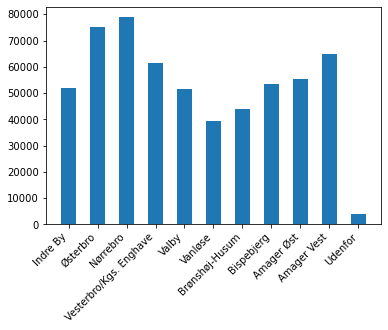

In [5]:
import matplotlib.pyplot as plt

# people_sorted = sorted(np.copy(per_neighborhood))

plt.bar(neighb.values(), per_neighborhood, width=0.5, align=('center'))
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light')

In [6]:
age_mask = (dd[:,2] > 65) & (dd[:,0] == 2015)
per_neighborhood = np.array([number_of_people_per_neighbourhood(n, age_mask) for n in neighb.keys()])
print('Folk over 65 i København i 2015:',per_neighborhood.sum())


Folk over 65 i København i 2015: 55750


In [7]:
nordic_countries = {5104: 'Finland', 5106: 'Island', 5110: 'Norge', 5120: 'Sverige'}
def other_nordic_countries(n, mask):
    all_people_in_given_n = dd[mask & (dd[:,3] == n)]
    sum_of_people = all_people_in_given_n[:,4].sum()
    return sum_of_people

In [8]:
other_over_65 = np.array([other_nordic_countries(n, age_mask) for n in nordic_countries.keys()])
print('Folk over 65 i København i 2015, fra de nordiske lande(ikke dk):', other_over_65.sum())

Folk over 65 i København i 2015, fra de nordiske lande(ikke dk): 608


In [9]:
#Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015
vesterbro_østerbro = {4: 'Vesterbro/Kgs. Enghave', 2: 'Østerbro'}
mask = (dd[:,0] >= 1992) & (dd[:,0] <= 2015)
def østerbro_vesterbro(n, mask):
    all_people_in_given_n = dd[mask & (dd[:,1] == n)]
    sum_of_people = all_people_in_given_n[:,4].sum()
    return sum_of_people
people_in_østerbro_vesterbro = np.array([østerbro_vesterbro(n, mask) for n in vesterbro_østerbro.keys()])
print(people_in_østerbro_vesterbro)

[1248038 1625260]


Vesterbro: {1992: 47854, 1993: 47589, 1994: 47538, 1995: 47633, 1996: 47734, 1997: 48275, 1998: 49109, 1999: 49520, 2000: 50312, 2001: 50756, 2002: 51039, 2003: 51045, 2004: 50869, 2005: 50643, 2006: 50303, 2007: 50964, 2008: 51466, 2009: 53351, 2010: 55315, 2011: 57150, 2012: 58411, 2013: 59211, 2014: 60328, 2015: 61623} 

Østerbro {1992: 62221, 1993: 62583, 1994: 63050, 1995: 63572, 1996: 64503, 1997: 65856, 1998: 66148, 1999: 66295, 2000: 66673, 2001: 66877, 2002: 67020, 2003: 67550, 2004: 67516, 2005: 67671, 2006: 67351, 2007: 67330, 2008: 67964, 2009: 68769, 2010: 69951, 2011: 70938, 2012: 72400, 2013: 73388, 2014: 74521, 2015: 75113}


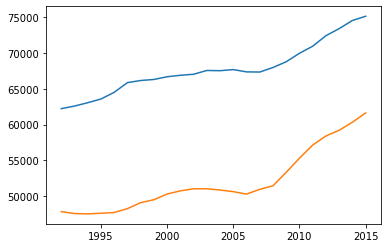

In [10]:
vesterbro = {}
østerbro = {}
years = list(np.unique(dd[:,0]))
for year in years:
    mask = (dd[:,0] == year) & (dd[:,1] == 4)
    sum = np.sum(dd[mask][:,4])
    vesterbro.update({year: sum})
print('Vesterbro:',vesterbro, '\n')
for year in years:
    mask = (dd[:,0] == year) & (dd[:,1] == 2)
    sum = np.sum(dd[mask][:,4])
    østerbro.update({year: sum})
print('Østerbro',østerbro)
østerbro_values = list(østerbro.values())
vesterbro_values = list(vesterbro.values())

plt.plot(years, østerbro_values)
plt.plot(years, vesterbro_values)